<a href="https://colab.research.google.com/github/sadoky/Pandas/blob/master/RED_GRU_intervalos_7DAYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler






#[dataset['AirTemp'].iloc[0:8700]]

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv')


In [ ]:
set_entrenamiento1= (dataset["Ghi"].iloc[0:4000])
set_validacion1 = dataset["Ghi"].iloc[4000:6240]

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento=set_entrenamiento1.values.reshape(-1,1)
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

In [ ]:
time_step = 60
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

In [ ]:
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 50

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(GRU(units=na, input_shape=dim_entrada))

In [ ]:
modelo.add(Dense(units=dim_salida))

In [ ]:
from keras.callbacks import learning_rate_schedule
modelo.compile(optimizer="adam", loss='mse')

In [ ]:
history=modelo.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)


Epoch 1/20
124/124 - 10s - loss: 0.0067 - 10s/epoch - 79ms/step
Epoch 2/20
124/124 - 3s - loss: 0.0016 - 3s/epoch - 25ms/step
Epoch 3/20
124/124 - 3s - loss: 0.0013 - 3s/epoch - 26ms/step
Epoch 4/20
124/124 - 3s - loss: 0.0010 - 3s/epoch - 25ms/step
Epoch 5/20
124/124 - 3s - loss: 9.0896e-04 - 3s/epoch - 25ms/step
Epoch 6/20
124/124 - 3s - loss: 7.9149e-04 - 3s/epoch - 26ms/step
Epoch 7/20
124/124 - 3s - loss: 7.0627e-04 - 3s/epoch - 26ms/step
Epoch 8/20
124/124 - 3s - loss: 6.3456e-04 - 3s/epoch - 26ms/step
Epoch 9/20
124/124 - 3s - loss: 5.8366e-04 - 3s/epoch - 26ms/step
Epoch 10/20
124/124 - 3s - loss: 5.2137e-04 - 3s/epoch - 26ms/step
Epoch 11/20
124/124 - 3s - loss: 4.8187e-04 - 3s/epoch - 26ms/step
Epoch 12/20
124/124 - 3s - loss: 4.2775e-04 - 3s/epoch - 26ms/step
Epoch 13/20
124/124 - 3s - loss: 4.1431e-04 - 3s/epoch - 25ms/step
Epoch 14/20
124/124 - 3s - loss: 3.9066e-04 - 3s/epoch - 25ms/step
Epoch 15/20
124/124 - 3s - loss: 3.3721e-04 - 3s/epoch - 26ms/step
Epoch 16/20
124/12

In [ ]:


history_dict = history.history
print(history_dict.keys())

dict_keys(['loss'])


In [ ]:
x_test = set_validacion1.values
x_test=x_test.reshape(-1,1)
x_test = sc.transform(x_test)

In [ ]:
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)


In [ ]:
prediccion = modelo.predict(x_test)
prediccion = sc.inverse_transform(prediccion)
prediccion2=pd.DataFrame(prediccion)


In [ ]:
prediccion2


,0
0,550.283691
1,516.854492
2,473.429626
3,424.466858
4,370.072510
...,...
2235,617.484253
2236,577.986023
2237,598.447571
2238,673.327576


In [ ]:
xaxis=np.arange(start=0,stop=43500,step=5)



In [ ]:
url='https://raw.githubusercontent.com/sadoky/Pandas/master/1.232462_-77.293538_Solcast_PT5M.csv'
df=pd.read_csv(url)
datos_train=df["Ghi"].iloc[0:4000]
datos_val=df["Ghi"].iloc[4001:6240]

datos_val


4001    342
4002    312
4003    278
4004    240
4005    200
       ... 
6235    411
6236    384
6237    398
6238    449
6239    524
Name: Ghi, Length: 2239, dtype: int64

In [ ]:
from numpy.matrixlib.defmatrix import concatenate

j=np.zeros(4000,int)
pred44=pd.DataFrame(j)
pred56=np.asarray(prediccion2,dtype=np.float64)

pred56=pred56.reshape(-1,1)
pred57=j.reshape(-1,1)
pred56





array([[550.28369141],
       [516.85449219],
       [473.42962646],
       ...,
       [598.4475708 ],
       [673.32757568],
       [784.36236572]])

In [ ]:
lim=np.concatenate((pred57,pred56))
lim
lim2=pd.DataFrame(lim)
prediccion_final=lim2[4000:]

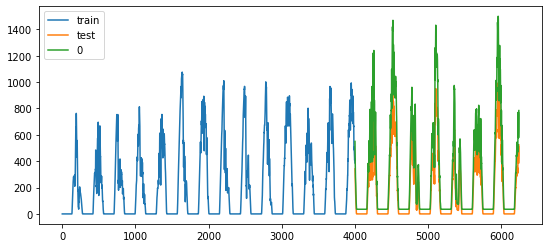

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
prediccion_final.plot(ax=ax,label="predict")

ax.legend();

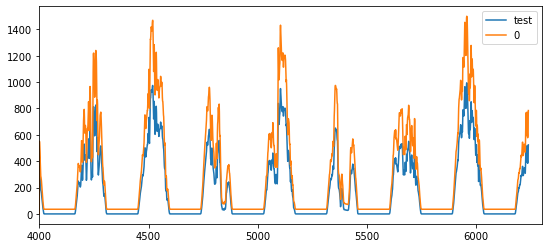

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
#datos_train.plot(ax=ax, label='train')
datos_val.plot(ax=ax, label='test')
lim2.plot(ax=ax, label='predict')
plt.xlim(4000,6300)
ax.legend();



